In [1]:
%pylab inline
import time
import numpy as np
from segbench import edgeNms2d
from segbench import correspondPixels
from scipy import signal
from scipy import misc
import scipy.ndimage as ndimage
from scipy.ndimage import filters
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Populating the interactive namespace from numpy and matplotlib


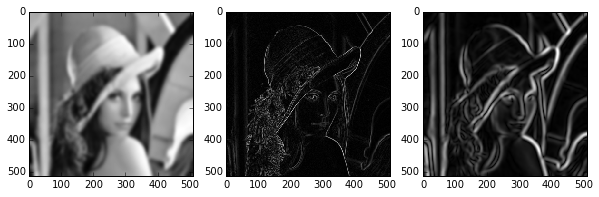

In [2]:
I = misc.lena().astype(float)
sx = ndimage.sobel(I, axis=0, mode='constant')
sy = ndimage.sobel(I, axis=1, mode='constant')
E = np.hypot(sx, sy)
r = 10
def edgeO(E,r):
    if(r<=1):
        p=12/r/(r+2)-2;f=np.array([1,p,1])/(2+p); r=1;
    else:
        f = np.array(hstack((range(1,r),r+1,range(r,1,-1))),dtype=float)/(r+1)**2
    F = np.zeros((len(f),len(f)))
    F[:,len(f)/2] = f
    F = signal.convolve2d(F,F.T,mode='full')
    En = signal.convolve2d(E,F,mode='same')
    Ox,Oy = np.gradient(En)
    Oxx,_ = np.gradient(Ox);Oxy,Oyy = np.gradient(Oy);
    return np.arctan(Oyy*np.sign(-Oxy)/(Oxx+1e-5))
O = edgeO(E,r)
I = filters.gaussian_filter(I+np.random.rand(512,512)*10,5)
Gx,Gy = np.gradient(I)
E1 = np.sqrt(np.power(Gx,2)+np.power(Gy,2))
O1 = edgeO(E1,r)
subplot(1,3,1)
imshow(I)
subplot(1,3,2)
imshow(E)
subplot(1,3,3)
imshow(E1)

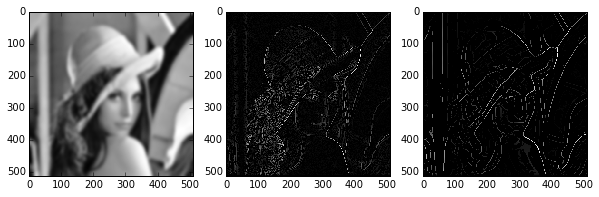

In [3]:
Enms = np.zeros_like(E).astype(float)
Enms1 = np.zeros_like(E).astype(float)
edgeNms2d(E.astype(float),
          O.astype(float),
          Enms,
          1,5,1.2)
edgeNms2d(E1.astype(float),
          O1.astype(float),
          Enms1,
          1,5,1.01)

subplot(1,3,1)
imshow(I)
subplot(1,3,2)
imshow(Enms)
subplot(1,3,3)
imshow(Enms1)

In [ ]:
match1 = zeros_like(Enms)
match2 = zeros_like(Enms1)
cost,oc = correspondPixels(Enms,Enms1,match1,match2,.00075)

314889973.499 3620.38671968


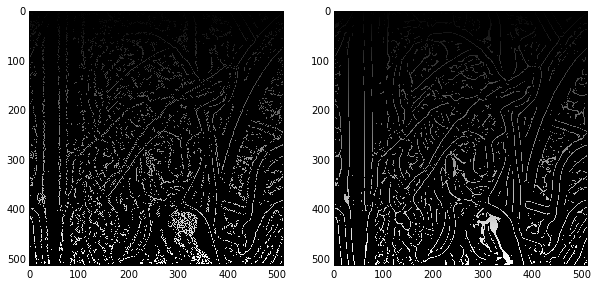

In [6]:
print cost,oc
subplot(1,2,1)
imshow(match1)
subplot(1,2,2)
imshow(match2)

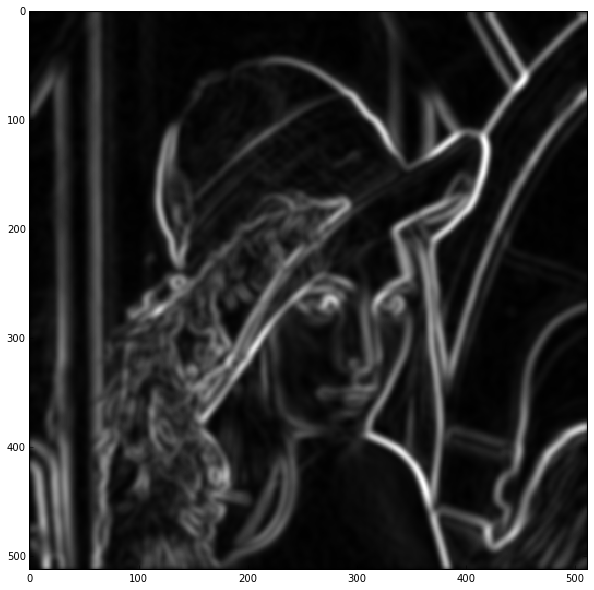